In [1]:
import wget

In [2]:
wget.download('https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa')


'lambda_virus (2).fa'

In [3]:
lambda_virus = open("lambda_virus.fa")

In [12]:
lambda_virus.seek(0)
def read_FAST_A(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

dna = read_FAST_A('lambda_virus.fa')


In [13]:
def naive(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        match = True
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                match = False
                break
        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences

def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t


In [14]:
len(naive('AGGT', dna)) + len(naive('ACCT', dna))

306

In [15]:
len(naive('TTAA', dna))

195

In [16]:
 def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t

def naive(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  
        match = True
        for j in range(len(p)):  
            if t[i+j] != p[j]:  
                match = False
                break
        if match:
            occurrences.append(i)  
    return occurrences

In [17]:
naive('ACTAAGT', dna)

[27733, 45382]

In [18]:
naive(reverseComplement('ACTAAGT'), dna)

[26028]

In [19]:
len(naive('AGGT', dna)) + len(naive(reverseComplement('AGGT'), dna))

306

In [20]:
len(naive('TTAA', dna))

195

In [21]:
naive('AGTCGA', dna) 

[18005, 23320, 33657, 44806]

In [22]:
naive(reverseComplement('AGTCGA'), dna)

[450, 1908, 2472, 41927, 45369]

In [37]:
def naive2(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        match = 0
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                match += 1
                if match > 2:
                    break
        if match <= 2:
        
            occurrences.append(i)  # all chars matched; record
    return occurrences

In [39]:
len(naive2('TTCAAGCC', dna))

191

In [41]:
len(naive2('AGGAGGTT', dna))

215

In [26]:
wget.download('https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq')

'ERR037900_1.first1000 (1).fastq'

In [27]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline()
            seq = fh.readline().rstrip()
            fh.readline()
            qual = fh.readline().rstrip()
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities


In [28]:
seqs, quals = readFastq('ERR037900_1.first1000.fastq')

In [29]:
def phred33ToQ(qual):
    return ord(qual) - 33

In [30]:
def createHist(qualities):
    hist = [0] * 50
    for qual in qualities:
        for phred in qual:
            q = phred33ToQ(phred)
            hist[q] += 1
    return hist

In [31]:
h = createHist(quals)

In [32]:
print(h)

[0, 0, 17723, 0, 2, 11, 11, 28, 23, 55, 100, 111, 86, 174, 185, 272, 317, 259, 390, 1523, 2782, 762, 286, 413, 403, 538, 351, 694, 971, 777, 1024, 1449, 1341, 1312, 1916, 2233, 3025, 4043, 6640, 45696, 2074, 0, 0, 0, 0, 0, 0, 0, 0, 0]


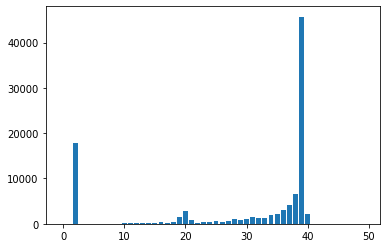

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(range(len(h)), h)
plt.show()